In [1]:
cd /g/data/tm70/as2285/access_analysis/access-eval-recipes/


/g/data/tm70/as2285/access_analysis/access-eval-recipes


In [2]:
ls

building_Intake_Datastore_1Experiment.ipynb
Checks_for_hgrid.ipynb
COPYRIGHT.txt
horizontal_grid.nc
LICENSE
make_hgrid*
mediator_output.ipynb
README.md
SeaIce_Obs_Model_Compare_converted.ipynb
Untitled1.ipynb
Untitled.ipynb


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
om2_grid = xr.open_dataset('/g/data/vk83/experiments/inputs/access-om2/ocean/grids/mosaic/global.1deg/2020.05.30/ocean_hgrid.nc')

In [5]:
om2_grid

<xarray.Dataset> Size: 21MB
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 255B ...
    x         (nyp, nxp) float64 3MB ...
    y         (nyp, nxp) float64 3MB ...
    dx        (nyp, nx) float64 3MB ...
    dy        (ny, nxp) float64 3MB ...
    angle_dx  (nyp, nxp) float64 3MB ...
    area      (ny, nx) float64 3MB ...

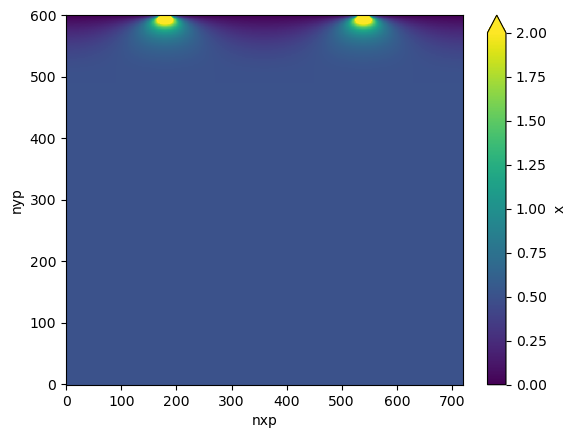

In [6]:
om2_grid.x.diff("nxp").plot(vmax=2)

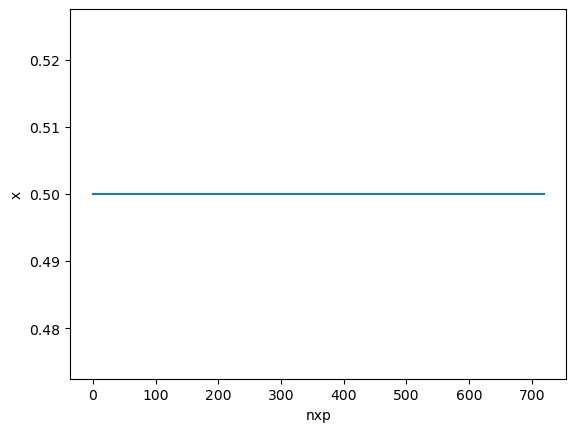

In [7]:
#lon resolution
om2_grid.x.where(om2_grid.y==-30,drop=True).diff("nxp").plot()

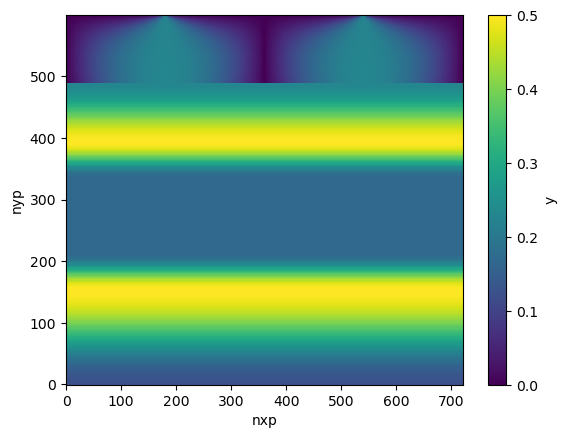

In [8]:
# lat resolution
om2_grid.y.diff("nyp").plot()

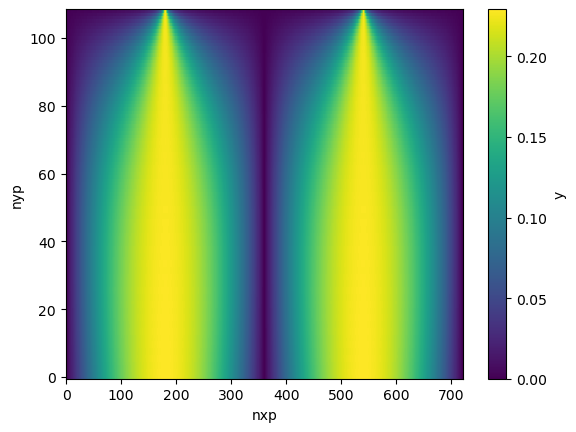

In [9]:
# lat resolution (only in tripole)
om2_grid.isel(nyp=range(490,600)).y.diff("nyp").plot()

In [10]:
# resolutions are fairly arbitrary numbers!
# resolution at tripole :
om2_grid.isel(nyp=range(490,600)).y.diff("nyp").max()

<xarray.DataArray 'y' ()> Size: 8B
array(0.2293102)

In [16]:
geolon = om2_grid.isel(nxp=180).y

In [43]:
# index of change points in grid
lons = geolon.nyp.where(
    (geolon==-78)
    + (geolon==-30)
    + (geolon==-10)
    + (geolon==10)
    + (geolon==30)
    + (geolon==65)
    + (geolon==90),
    drop=True)

In [44]:
lons.values

array([  0., 154., 214., 334., 394., 490., 600.])

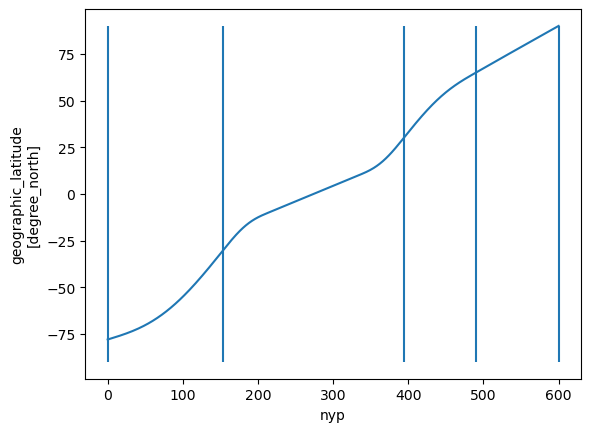

In [42]:
geolon.plot()
plt.vlines(lons,-90,90)

In [160]:
dlon = 2*geolon.diff('nyp').isel(nyp=[0,153,213,333,393,489,599]) # index is one smaller now due to diff

In [161]:
dlon

<xarray.DataArray 'y' (nyp: 7)> Size: 56B
array([0.24675325, 1.        , 0.33241844, 0.33241844, 1.00000001,
       0.45804317, 0.45104774])
Dimensions without coordinates: nyp

In [78]:
dlon.values

array([0.24675325, 1.        , 0.33241844, 0.33241844, 1.00000001,
       0.45804317, 0.45104774])

In [173]:
! ./make_hgrid


                                                                                 
                                                                                 
                    Usage of make_hgrid                                          
                                                                                 
   make_hgrid --grid_type grid_type --my_grid_file my_grid_file                  
                  --nxbnds nxbnds --nybnds nybnds                                
                  --xbnds x(1),...,x(nxbnds) --ybnds y(1),...,y(nybnds)          
                  --nlon nlon(1),...nlon(nxbnds-1)                               
                  --nlat nlat(1),...nlat(nybnds-1)                               
                  --dlon dlon(1),...dlon(nxbnds)                                 
                  --dlat dlat(1),...dlat(nybnds)                                 
                  --lat_join lat_join --num_lon num_lon --nratio nratio          
               

In [364]:
! rm horizontal_grid.nc

# ! ./make_hgrid --grid_type tripolar_grid --nxbnds 2 --nybnds 7 --xbnd -280,80 --ybnd -78,-30,-10,10,30,65,90 --nlon 720 --nlat 154,60,120,60,96,110 --center c_cell --rotate_poly

# ! ./make_hgrid --grid_type tripolar_grid --nxbnd 2 --nybnd 7 --xbnd -280,80 --ybnd -82,-30,-10,0,10,30,90 --nlon 720 --nlat 104,48,40,40,48,120 --rotate_poly --center c_cell

! ./make_hgrid --verbose --grid_type tripolar_grid --nxbnds 2 --nybnds 7 --xbnd -280,80 --ybnd -78,-30,-10,10,30,65,90 --dlon 1,1 --dlat 0.2467532468,1,0.3333333333333,0.33333333333333,1,0.4583333333,0.450757580 --center c_cell --rotate_poly

==>NOTE: the grid type is tripolar_grid
[INFO] make_hgrid.c Number of tiles (ntiles): 1
[INFO] make_hgrid.c Number of global tiles (ntiles_global): 1
[INFO] tile: 0, nxl[720], nyl[600], ntiles: 1
[INFO] Allocating arrays of size 433321 for x, y based on nxp: 721 nyp: 601 ntiles: 1
NOTE: Change join latitude from 65.000000 to 65.000000
Writing out horizontal_grid.nc.
[INFO] Outputting arrays of size nx: 720 and ny: 600 for tile: 0
[INFO] START NC XARRAY write out_halo=0 tile number = n: 0 offset = pos_c: 0
[INFO] XARRAY: n: 0 x[0]: -280.000000 x[1]: -279.500000 x[2]: -279.000000 x[3]: -278.500000 x[4]: -278.000000 x[5]: -277.500000 x[10]: -275.000000
About to close horizontal_grid.nc
[INFO] INDEX Before increment n: 0 pos_c 0 nxp 721 nyp 601 nxp*nyp 433321
[INFO] INDEX After increment n: 0 pos_c 433321.
generate_grid is run successfully. 


In [365]:
new_grid = xr.open_dataset('horizontal_grid.nc')

new_grid

<xarray.Dataset> Size: 21MB
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 255B ...
    x         (nyp, nxp) float64 3MB ...
    y         (nyp, nxp) float64 3MB ...
    dx        (nyp, nx) float64 3MB ...
    dy        (ny, nxp) float64 3MB ...
    area      (ny, nx) float64 3MB ...
    angle_dx  (nyp, nxp) float64 3MB ...
    arcx      |S255 255B ...
Attributes:
    grid_version:          0.2
    code_release_version:  2024.02
    git_hash:              9758ee96233846579868e22d86a7a07d3b711b42
    creationtime:          Fri Jun 28 13:45:07 2024
    hostname:              gadi-cpu-clx-1258.gadi.nci.org.au
    history:               ./make_hgrid --verbose --grid_type tripolar_grid -...

In [366]:
geolon_new = new_grid.isel(nxp=180).y

geolon_new[[0, 154, 214, 334, 394, 490, 600]].values

array([-78., -30., -10.,  10.,  30.,  65.,  90.])

In [377]:
geolon_new[154]+30

<xarray.DataArray 'y' ()> Size: 8B
array(1.80010318e-09)

In [367]:
# index of change points in grid
lons_new = geolon_new.nyp.where(
    (geolon_new==-78)
    + (geolon_new==-30)
    + (geolon_new==-10)
    + (geolon_new==10)
    + (geolon_new==30)
    + (geolon_new==65)
    + (geolon_new==90),
    drop=True)

In [368]:
lons.values

array([  0., 154., 214., 334., 394., 490., 600.])

In [369]:
lons_new.values

array([  0., 600.])

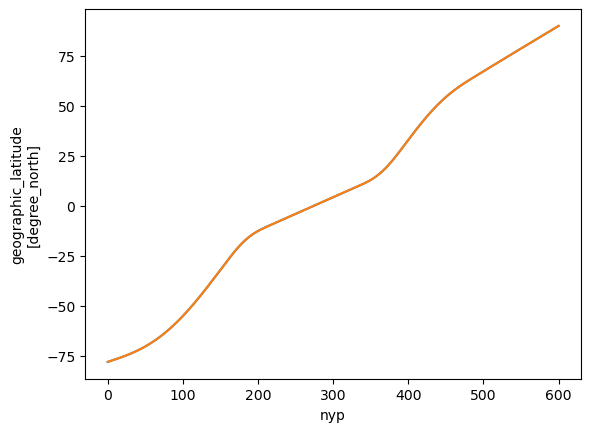

In [370]:
om2_grid.y.isel(nxp=180).plot()
new_grid.y.isel(nxp=180).plot()

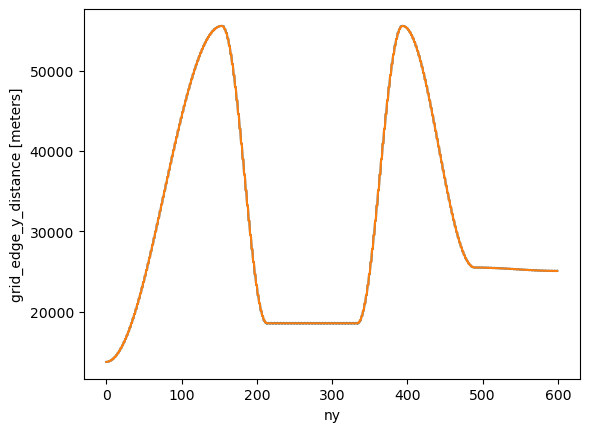

In [371]:
om2_grid.dy.isel(nxp=180).plot()
new_grid.dy.isel(nxp=180).plot()

dx anom min: -1.3858984421240166, anom max: 1.759466504699958
dy anom min: -50.865913409626955, anom max: 50.865917114053445
area anom min: -88893006.12221974, anom max: 27261189.61849016
y anom min: -0.004593042695404392, anom max: 0.004593044293873305
x anom min: -0.0184446269524301, anom max: 0.0184446269524301
angle_dx anom min: -0.01633557835323529, anom max: 0.016335578353150026


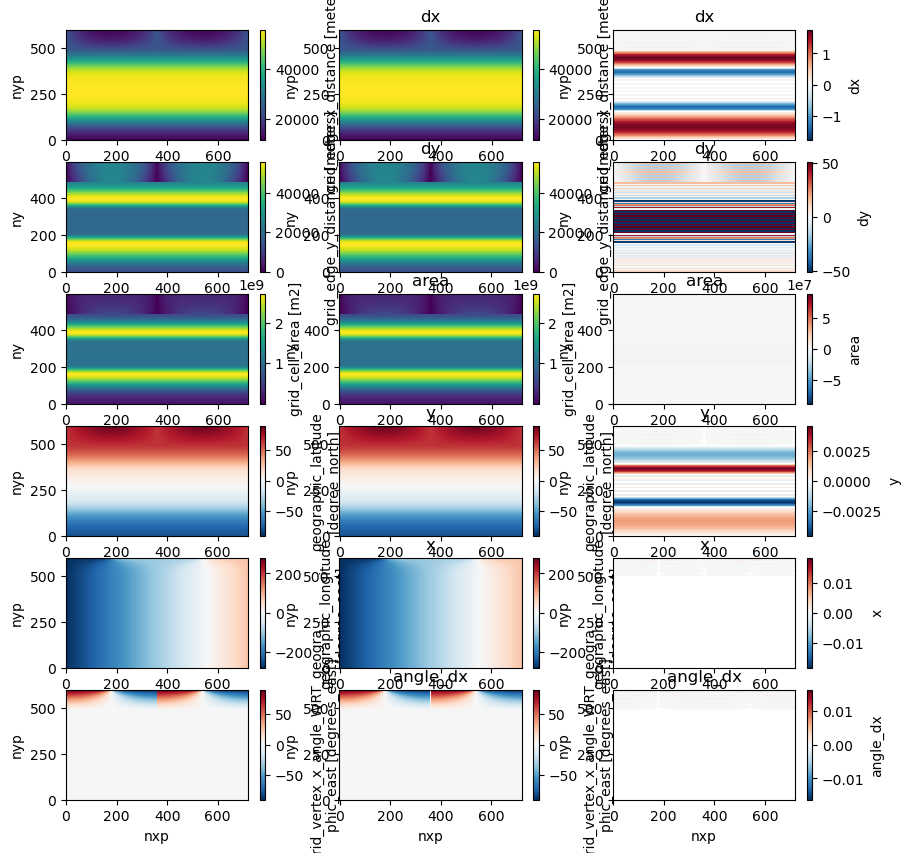

In [372]:
vars = set(om2_grid.variables).intersection(new_grid.variables)

vars.discard('tile')

vars

len(vars)


plt.figure(figsize=(10,10))

for j,jVar in enumerate(vars):

    # print(f'{jVar}')

    plt.subplot(
        len(vars) ,
        3,
        (j*3)+1
    )

    om2_grid[jVar].plot()
    
    plt.subplot(
        len(vars) ,
        3,
        (j*3)+2
    )
    
    new_grid[jVar].plot()

    plt.title(jVar)
    
    plt.subplot(
        len(vars) ,
        3,
        (j*3)+3
    )
    
            
    anom = (new_grid[jVar]-om2_grid[jVar])
    
    anom = anom.where(abs(anom)>2e-6)
    
    print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')
    
    
    anom.plot()
    
    
    plt.title(jVar)

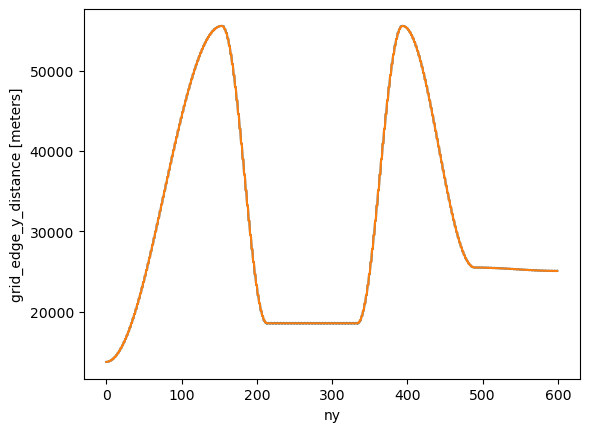

In [378]:
om2_grid.dy.isel(nxp=180).plot()
new_grid.dy.isel(nxp=180).plot()